# 1. Data Loading & Summary

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import cluster
from sklearn.decomposition import PCA
plt.style.use("ggplot")

In [2]:
# Load the data
data = pd.read_csv('vgsales.csv')

In [3]:
# Filter for data before 2017
data = data[data['Year']<2017]

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# Data Summary: There are fields with NA and type for Year is float
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16323 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16323 non-null  int64  
 1   Name          16323 non-null  object 
 2   Platform      16323 non-null  object 
 3   Year          16323 non-null  float64
 4   Genre         16323 non-null  object 
 5   Publisher     16287 non-null  object 
 6   NA_Sales      16323 non-null  float64
 7   EU_Sales      16323 non-null  float64
 8   JP_Sales      16323 non-null  float64
 9   Other_Sales   16323 non-null  float64
 10  Global_Sales  16323 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
# Remove records with NA fields
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16287 non-null  int64  
 1   Name          16287 non-null  object 
 2   Platform      16287 non-null  object 
 3   Year          16287 non-null  float64
 4   Genre         16287 non-null  object 
 5   Publisher     16287 non-null  object 
 6   NA_Sales      16287 non-null  float64
 7   EU_Sales      16287 non-null  float64
 8   JP_Sales      16287 non-null  float64
 9   Other_Sales   16287 non-null  float64
 10  Global_Sales  16287 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
# Change type of Year from float to int
data['Year'] = data['Year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16287 non-null  int64  
 1   Name          16287 non-null  object 
 2   Platform      16287 non-null  object 
 3   Year          16287 non-null  int64  
 4   Genre         16287 non-null  object 
 5   Publisher     16287 non-null  object 
 6   NA_Sales      16287 non-null  float64
 7   EU_Sales      16287 non-null  float64
 8   JP_Sales      16287 non-null  float64
 9   Other_Sales   16287 non-null  float64
 10  Global_Sales  16287 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [9]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 2. Descriptive analysis

This can be done through frequency tables, graphs and measures of central tendency, such as mean, median, mode, dispersion measures such as standard deviation, and correlations.

## A. Frequency Distribution

Using statistical techniques such as frequency tables, histograms and bar graphs we can better understand the way in which the phenomena under study are distributed.

### Quantitative variables
Year, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

#### (i) Year

In [10]:
# Frequency table: Year
frequency_year = pd.DataFrame(data.groupby('Year')['Name'].count().sort_values(ascending = False)).reset_index()
frequency_year['Percentage'] = frequency_year['Name']/sum(frequency_year['Name'])*100
frequency_year = frequency_year.rename(columns = {'Name':'Frequency'})
frequency_year

,Year,Frequency,Percentage
0,2009,1431,8.786148
1,2008,1428,8.767729
2,2010,1257,7.717812
3,2007,1201,7.373979
4,2011,1136,6.974888
5,2006,1008,6.188985
6,2005,936,5.746915
7,2002,829,5.089949
8,2003,775,4.758396
9,2004,744,4.568060


Text(0.5, 1.0, 'Histogram by Year')

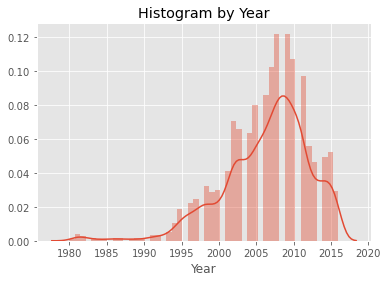

In [11]:
# Histogram
sns.distplot(data['Year'])

plt.title('Histogram by Year')

Text(0.5, 1.0, '10 most frequent years')

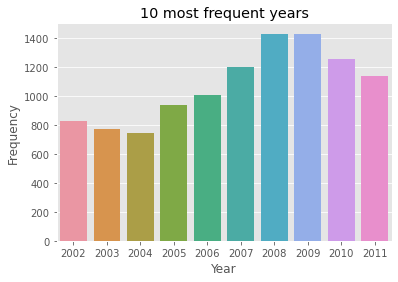

In [12]:
sns.barplot(data = frequency_year[:10], x = 'Year', y = 'Frequency')
plt.title('10 most frequent years')

Its seems like that 2008 to 2010 was game lovers years.

Text(0.5, 1.0, '10 least frequent years')

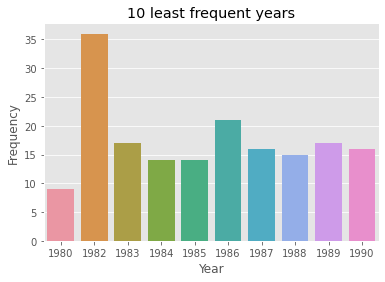

In [13]:
sns.barplot(data = frequency_year[-10:], x = 'Year', y = 'Frequency')
plt.title('10 least frequent years')

#### (ii) NA_Sales

Text(0, 0.5, 'Frequency')

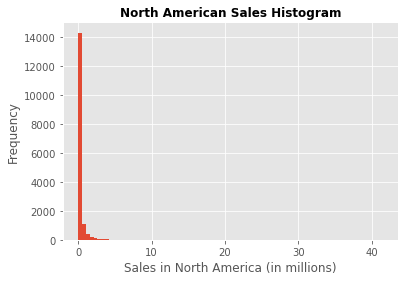

In [14]:
plt.hist(data['NA_Sales'], bins = 80)

plt.title("North American Sales Histogram",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Sales in North America (in millions)')

plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

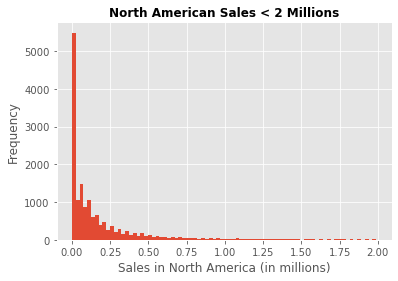

In [15]:
data_low = data[data['NA_Sales'] < 2]
plt.hist(data_low['NA_Sales'], bins = 80)

plt.title("North American Sales < 2 Millions",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Sales in North America (in millions)')

plt.ylabel('Frequency')

#### (iii) EU_Sales

Text(0, 0.5, 'Frequency')

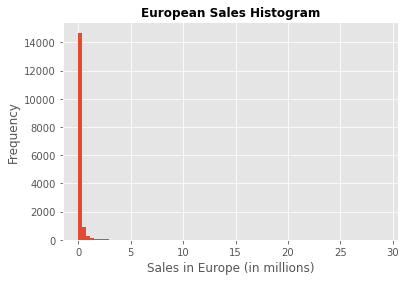

In [16]:
plt.hist(data['EU_Sales'], bins = 80)

plt.title("European Sales Histogram",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Sales in Europe (in millions)')

plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

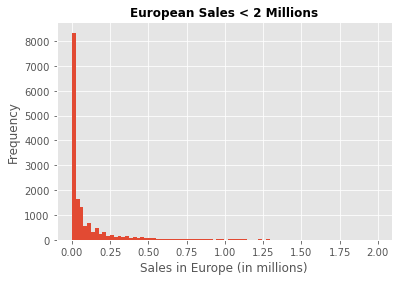

In [17]:
data_low = data[data['EU_Sales'] < 2]
plt.hist(data_low['EU_Sales'], bins = 80)

plt.title("European Sales < 2 Millions",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Sales in Europe (in millions)')

plt.ylabel('Frequency')

#### (iv) Japan_sales

Text(0, 0.5, 'Frequency')

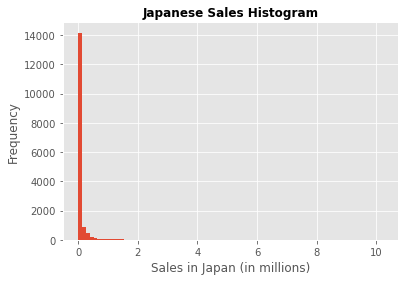

In [18]:
plt.hist(data['JP_Sales'], bins = 80)

plt.title("Japanese Sales Histogram",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Sales in Japan (in millions)')

plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

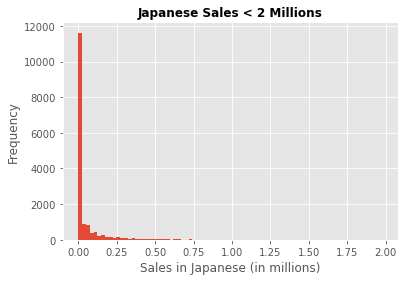

In [19]:
data_low = data[data['JP_Sales'] < 2]
plt.hist(data_low['JP_Sales'], bins = 80)

plt.title("Japanese Sales < 2 Millions",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Sales in Japanese (in millions)')

plt.ylabel('Frequency')

#### (v) Other_Sales

Text(0, 0.5, 'Frequency')

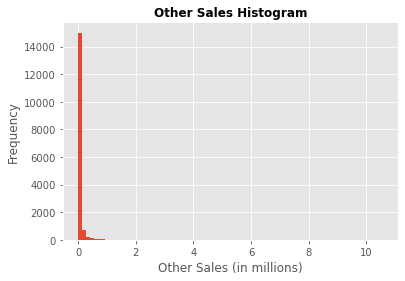

In [20]:
plt.hist(data['Other_Sales'], bins = 80)

plt.title("Other Sales Histogram",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Other Sales (in millions)')

plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

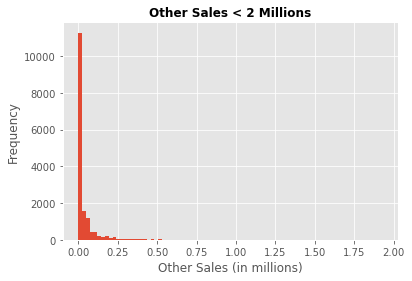

In [21]:
data_low = data[data['Other_Sales'] < 2]
plt.hist(data_low['Other_Sales'], bins = 80)

plt.title("Other Sales < 2 Millions",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Other Sales (in millions)')

plt.ylabel('Frequency')

#### Global Sales

Text(0, 0.5, 'Frequency')

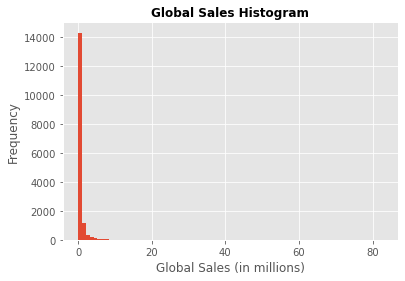

In [22]:
plt.hist(data['Global_Sales'], bins = 80)

plt.title("Global Sales Histogram",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Global Sales (in millions)')

plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

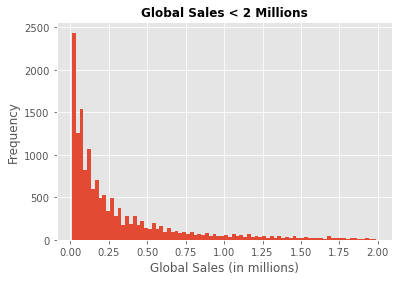

In [23]:
data_low = data[data['Global_Sales'] < 2]
plt.hist(data_low['Global_Sales'], bins = 80)

plt.title("Global Sales < 2 Millions",
         fontsize = 12,
         fontweight = 'bold')

plt.xlabel('Global Sales (in millions)')

plt.ylabel('Frequency')

Insights:  
- Sales of video games is mostly below 2 million dollars.
- Among US, EU and Japan, frequency of low value sales in Japan is the highest, followed by EU, suggesting that the game sales in US are generally the highest compared to EU, Japan and other regions.

## B. Distribution analysis of qualitative variables

Name, Platform, Genre, Publisher

#### (i) Name

In [24]:
# The 5 most frequent games in the database
frequency_name = pd.DataFrame(data.groupby('Name')['Year'].count().sort_values(ascending = False)).reset_index()
frequency_name['Percentage'] = frequency_name['Year']/sum(frequency_name['Year'])*100
frequency_name = frequency_name.rename(columns = {'Year':'Frequency'})
frequency_name.head()

,Name,Frequency,Percentage
0,Need for Speed: Most Wanted,12,0.073678
1,FIFA 14,9,0.055259
2,LEGO Marvel Super Heroes,9,0.055259
3,Ratatouille,9,0.055259
4,FIFA Soccer 13,8,0.049119


In [25]:
Need_for_Speed = data[data['Name'] == 'Need for Speed: Most Wanted']
Need_for_Speed

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


Above are the top 5 games with the highest frequency. Taking Need for Speed: Most Wanted as an example, there are different versions issued in different years, namely 2005,2012,2013. And during each issuance year, the game is developed for different platforms as well. For example in 2005, the game is available on 7 different platforms: PS2, X360, XB, GC, PC, DS and GBA.

#### (ii) Platform

In [26]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [27]:
# The 5 most frequent games in the database
frequency_pf = pd.DataFrame(data.groupby('Platform')['Year'].count().sort_values(ascending = False)).reset_index()
frequency_pf['Percentage'] = frequency_pf['Year']/sum(frequency_pf['Year'])*100
frequency_pf = frequency_pf.rename(columns = {'Year':'Frequency'})
frequency_pf.head()

,Platform,Frequency,Percentage
0,DS,2130,13.077915
1,PS2,2127,13.059495
2,PS3,1304,8.006385
3,Wii,1290,7.920427
4,X360,1234,7.576595


During 1980-2016, DS and PS2 are the most popular gaming platforms.

DS: a handheld game console produced by Nintendo. The device released globally across 2004 and 2005.

PS2: a home video game console developed and marketed by Sony Computer Entertainment. It was first released in 2000 around the world. The PS2 is the best-selling video game console of all time, having sold over 155 million units worldwide.

#### (iii) Genre

In [28]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [29]:
frequency_gr = pd.DataFrame(data.groupby('Genre')['Year'].count().sort_values(ascending = False)).reset_index()
frequency_gr['Percentage'] = frequency_gr['Year']/sum(frequency_gr['Year'])*100
frequency_gr = frequency_gr.rename(columns = {'Year':'Frequency'})
frequency_gr

,Genre,Frequency,Percentage
0,Action,3250,19.954565
1,Sports,2304,14.146252
2,Misc,1686,10.351814
3,Role-Playing,1468,9.013324
4,Shooter,1282,7.871308
5,Adventure,1274,7.822189
6,Racing,1225,7.521336
7,Platform,875,5.372383
8,Simulation,847,5.200467
9,Fighting,836,5.132928


Most of the people love action and sports game. in action 3251 and in sports 2304 games release.

Action：An action game is a video game genre that emphasizes physical challenges, including hand–eye coordination and reaction-time. In an action game, the player typically controls a character often in the form of a protagonist or avatar. This player character must navigate a level, collecting objects, avoiding obstacles, and battling enemies with their natural skills as well as weapons and other tools at their disposal. At the end of a level or group of levels, the player must often defeat a boss enemy that is more challenging and often a major antagonist in the game's story.

Sports: is a video game genre that simulates the practice of sports. Most sports have been recreated with a game, including team sports, track and field, extreme sports and combat sports. Some games emphasize actually playing the sport (such as the Madden NFL series), whilst others emphasize strategy and sport management (such as Football Manager and Out of the Park Baseball). Some, such as Need for Speed, Arch Rivals and Punch-Out!!, satirize the sport for comic effect. 

Text(0.5, 1.0, 'Genre Frequency Distribution')

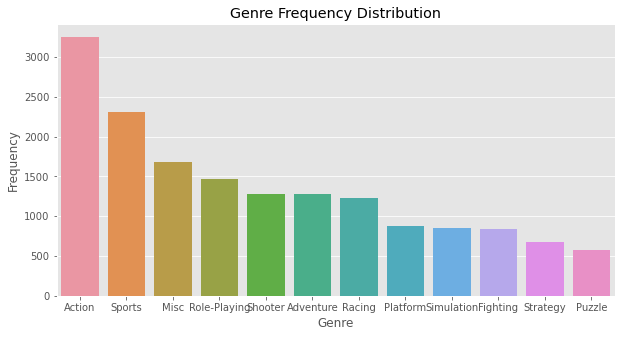

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(data = frequency_gr,
           x = 'Genre',
           y = 'Frequency')
plt.title('Genre Frequency Distribution')

#### (iv) Publisher

In [31]:
frequency_p = pd.DataFrame(data.groupby('Publisher')['Year'].count().sort_values(ascending = False)).reset_index()
frequency_p['Percentage'] = frequency_p['Year']/sum(frequency_p['Year'])*100
frequency_p = frequency_p.rename(columns = {'Year':'Frequency'})
frequency_p.head(10)

,Publisher,Frequency,Percentage
0,Electronic Arts,1339,8.221281
1,Activision,966,5.931111
2,Namco Bandai Games,928,5.697796
3,Ubisoft,917,5.630257
4,Konami Digital Entertainment,823,5.053110
5,THQ,712,4.371585
6,Nintendo,696,4.273347
7,Sony Computer Entertainment,682,4.187389
8,Sega,630,3.868116
9,Take-Two Interactive,412,2.529625


Eletronic Arts issued the most number of games during 1980-2016, followed by Activision and Namco Bandai Games.

Electronic Arts：an American video game company headquartered in Redwood City, California. It is the second-largest gaming company in the Americas and Europe by revenue and market capitalization after Activision Blizzard and ahead of Take-Two Interactive, CD Projekt, and Ubisoft as of May 2020.

Activision: an American video game publisher based in Santa Monica, California. It currently serves as the publishing business for its parent company, Activision Blizzard, and consists of several subsidiary studios. Activision is one of the largest third-party video game publishers in the world and was the top United States publisher in 2016.

## C. Central tendency

The most common measures of central tendency are the arithmetic mean, the median and mode.

#### Mean

In [32]:
df_mean = pd.DataFrame(data.iloc[:,-5:].mean()).rename(columns = {0:'Mean'})
df_mean['Percentage'] = df_mean['Mean']/df_mean.iloc[-1,0]
df_mean

,Mean,Percentage
NA_Sales,0.265695,0.491099
EU_Sales,0.147768,0.273127
JP_Sales,0.078849,0.145741
Other_Sales,0.048437,0.089528
Global_Sales,0.541022,1.000000


The biggest markets for games in the world during 1980-2016 are Northern America and Europe, which contributed to 49% and 27% of global sales. 

#### Median

In [33]:
df_median = pd.DataFrame(data.iloc[:,-5:].median()).rename(columns = {0:'Median'})
df_median

,Median
NA_Sales,0.08
EU_Sales,0.02
JP_Sales,0.00
Other_Sales,0.01
Global_Sales,0.17


Though Japan sales contributed to around 15% of global sales, the median sales of Japan is far below the Global median, suggesting that generally sales in Japan is low for most of the games, with some exceptions. 

#### Mode

In [34]:
df_mode = pd.DataFrame(data.iloc[:,-5:].mode()).T.rename(columns = {0:'Mode'})
df_mode

,Mode
NA_Sales,0.00
EU_Sales,0.00
JP_Sales,0.00
Other_Sales,0.00
Global_Sales,0.02


## D. Dispersion Measures

Common examples of statistical dispersion measures are variance, standard deviation and interquartile range. Dispersion is contrasted with central position or trend, and together they are the most widely used distribution properties.

In [35]:
df_var = pd.DataFrame(data.iloc[:,-5:].var()).rename(columns = {0:'Variance'})
df_var

,Variance
NA_Sales,0.676548
EU_Sales,0.259448
JP_Sales,0.097292
Other_Sales,0.036140
Global_Sales,2.457118


In [36]:
df_var['std'] = pd.DataFrame(data.iloc[:,-5:].std()).rename(columns = {0:'Std'})
df_var

,Variance,std
NA_Sales,0.676548,0.822525
EU_Sales,0.259448,0.509360
JP_Sales,0.097292,0.311916
Other_Sales,0.036140,0.190105
Global_Sales,2.457118,1.567520


The distribution of sales in Northern America is also the widest among major markets, with the highest variance and std.

## E. Correlations

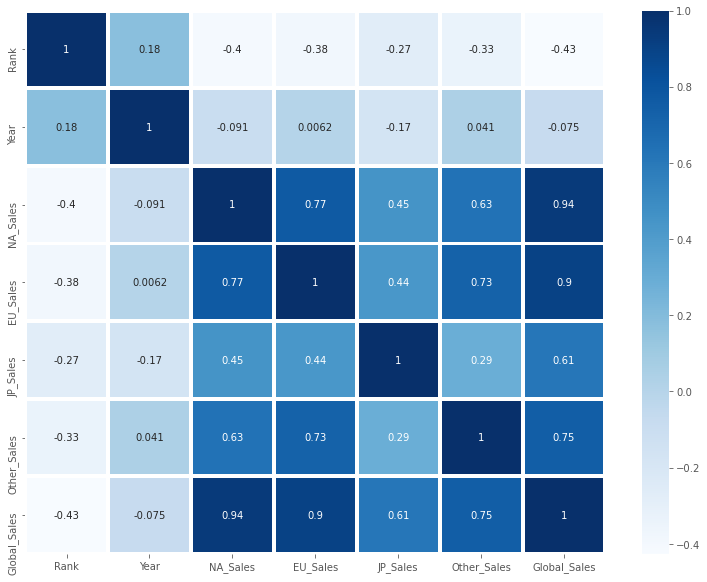

In [37]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

- Northern American sales and Europe Sales have greater effect to Global Sales.
- And NA_Sales and EU_Sales are largely correlated.

# 3. Exploratory Data Analysis

## World best selling games

In [38]:
count = pd.DataFrame(data.groupby('Name')['Year'].count()).sort_values('Year', ascending = False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

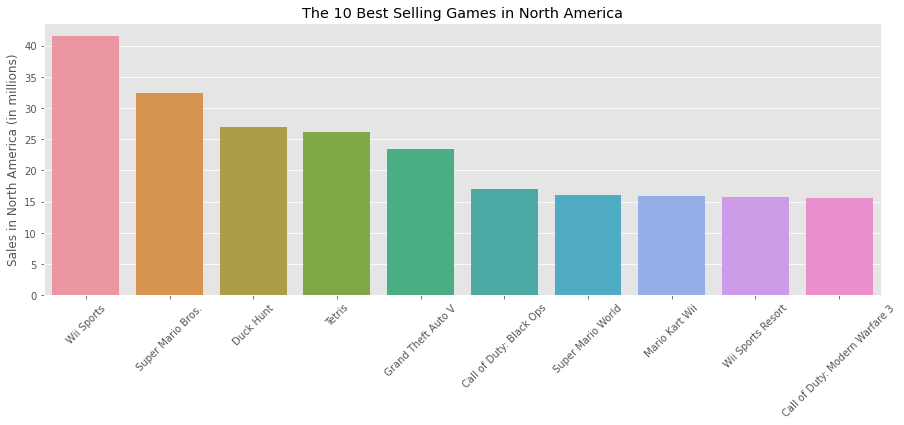

In [39]:
top_games_NA = pd.DataFrame(data.groupby('Name')['NA_Sales'].sum()).\
                            sort_values('NA_Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (15,5))
sns.barplot(data = top_games_NA,
           x = 'Name',
           y = 'NA_Sales')
plt.xlabel('')
plt.ylabel('Sales in North America (in millions)')
plt.title('The 10 Best Selling Games in North America')
plt.xticks(rotation = 45)

The games sold the best in Northern America are Wii Sports with over 40m sales, Super Mario Bros with around 32.5m sales.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

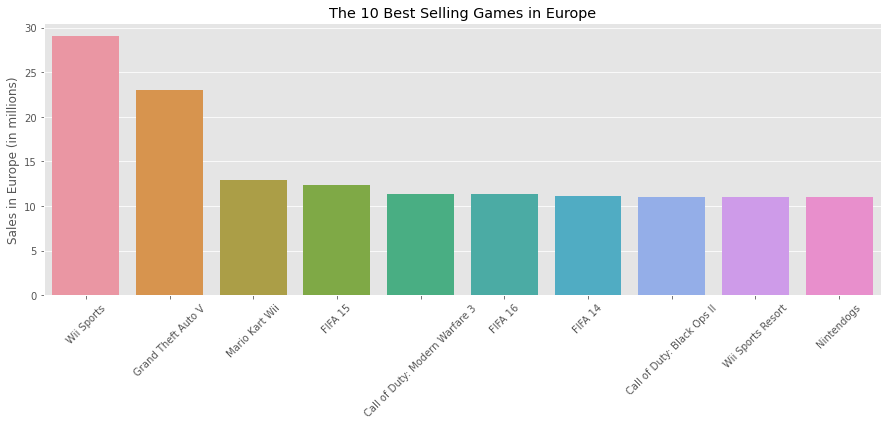

In [40]:
top_games_EU = pd.DataFrame(data.groupby('Name')['EU_Sales'].sum()).\
                            sort_values('EU_Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (15,5))
sns.barplot(data = top_games_EU,
           x = 'Name',
           y = 'EU_Sales')
plt.xlabel('')
plt.ylabel('Sales in Europe (in millions)')
plt.title('The 10 Best Selling Games in Europe')
plt.xticks(rotation = 45)

The games sold the best in Europe are Wii Sports with almost 30m sales, Grand Theft Auto V with around 23m sales.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

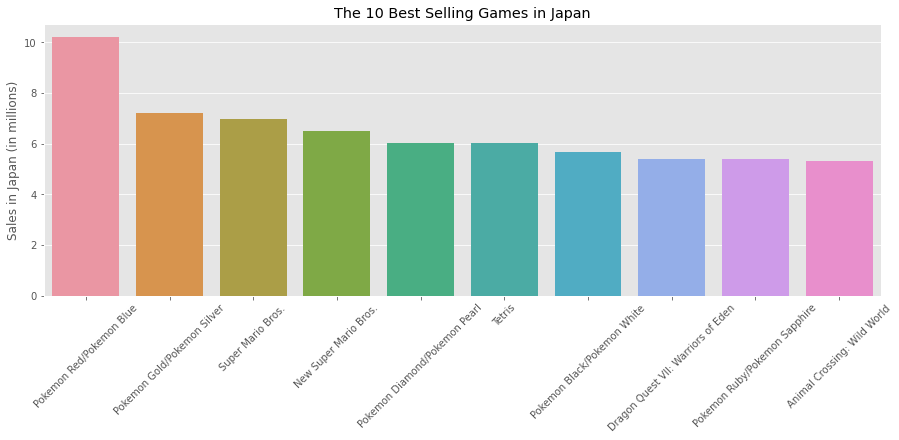

In [41]:
top_games_JP = pd.DataFrame(data.groupby('Name')['JP_Sales'].sum()).\
                            sort_values('JP_Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (15,5))
sns.barplot(data = top_games_JP,
           x = 'Name',
           y = 'JP_Sales')
plt.xlabel('')
plt.ylabel('Sales in Japan (in millions)')
plt.title('The 10 Best Selling Games in Japan')
plt.xticks(rotation = 45)

The games sold the best in Japan are Pokemon Red/Pokemon Blue with over 10m sales.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

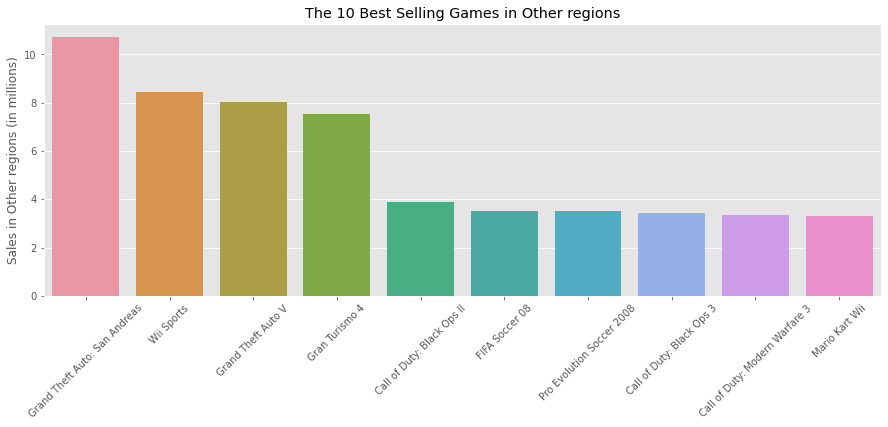

In [42]:
top_games_OT = pd.DataFrame(data.groupby('Name')['Other_Sales'].sum()).\
                            sort_values('Other_Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (15,5))
sns.barplot(data = top_games_OT,
           x = 'Name',
           y = 'Other_Sales')
plt.xlabel('')
plt.ylabel('Sales in Other regions (in millions)')
plt.title('The 10 Best Selling Games in Other regions')
plt.xticks(rotation = 45)

The games sold the best in other regions are Grand Theft Auto V with around 11m sales, Wii Sports with over 8m sales.

Text(0.5, 1.0, 'The 10 Best Selling Games in the World')

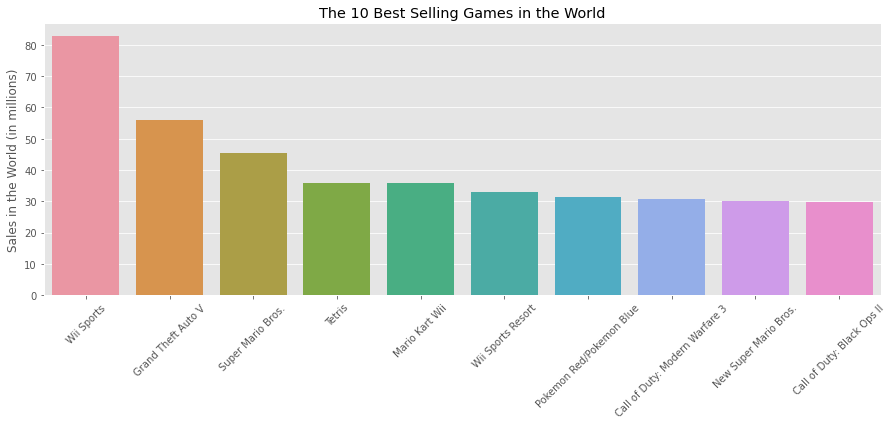

In [43]:
top_games = pd.DataFrame(data.groupby('Name')['Global_Sales'].sum()).\
                            sort_values('Global_Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (15,5))
sns.barplot(data = top_games,
           x = 'Name',
           y = 'Global_Sales')
plt.xlabel('')
plt.ylabel('Sales in the World (in millions)')
plt.xticks(rotation = 45)
plt.title('The 10 Best Selling Games in the World')

In [44]:
top_games

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Modern Warfare 3,30.83
8,New Super Mario Bros.,30.01
9,Call of Duty: Black Ops II,29.72


Overall, the best selling games are Wii Sports, Grand Theft Auto V and Super Mario Bros. with 83.74m, 55.92m and 45.31m sales during 1980-2016.

Wii Sports: a 2006 sports simulation video game developed and published by Nintendo for the Wii video game console. The game was released in North America along with the Wii on November 19, 2006, and was released in Japan, Oceania, and Europe the following month. It was included as a pack-in game with the console in all territories except Japan and South Korea, making it the first sports game included with the launch of a Nintendo system. Selling over 82 million copies by the end of 2017, it is the bestselling single-platform game of all time.

Grand Theft Auto V: a 2013 action-adventure game developed by Rockstar North and published by Rockstar Games. It is the second best-selling video game of all time with over 135 million copies shipped and one of the most financially successful entertainment products of all time, with about $6 billion in worldwide revenue.

Super Mario Bros.:  a platform game developed and published by Nintendo. It was released in Japan in 1985. It is one of the bestselling games of all time, with more than 40 million physical copies.

## Sales per platform

Text(0.5, 1.0, 'Number of Sales per Platform in Northern America')

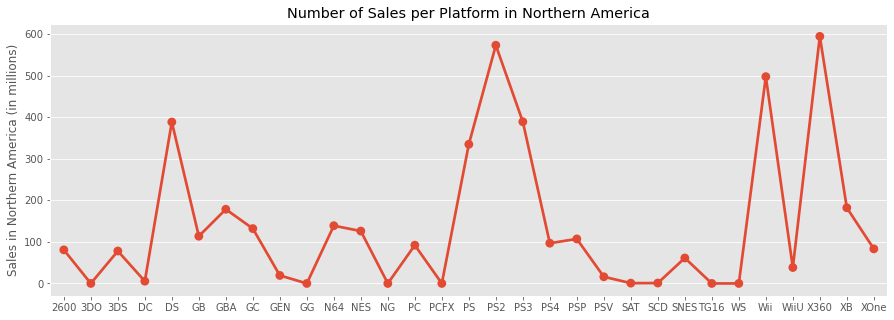

In [45]:
platform_NA = pd.DataFrame(data.groupby('Platform')['NA_Sales'].sum()).reset_index()

plt.figure(figsize = (15,5))
sns.pointplot(data = platform_NA,
           x = 'Platform',
           y = 'NA_Sales')
plt.xlabel('')
plt.ylabel('Sales in Northern America (in millions)')
plt.title('Number of Sales per Platform in Northern America')

Top selling platforms in Northern America are XB, PS2 and Wii.

Text(0.5, 1.0, 'Number of Sales per Platform in Europe')

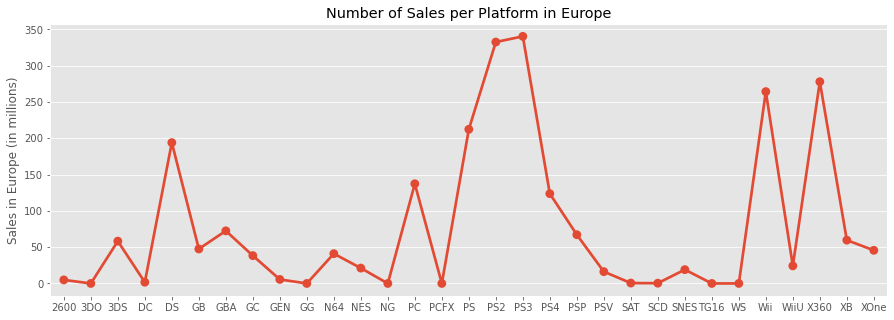

In [46]:
platform_EU = pd.DataFrame(data.groupby('Platform')['EU_Sales'].sum()).reset_index()

plt.figure(figsize = (15,5))
sns.pointplot(data = platform_EU,
           x = 'Platform',
           y = 'EU_Sales')
plt.xlabel('')
plt.ylabel('Sales in Europe (in millions)')
plt.title('Number of Sales per Platform in Europe')

Top selling platforms in Europe are PS3, PS2 and XB.

Text(0.5, 1.0, 'Number of Sales per Platform in Japan')

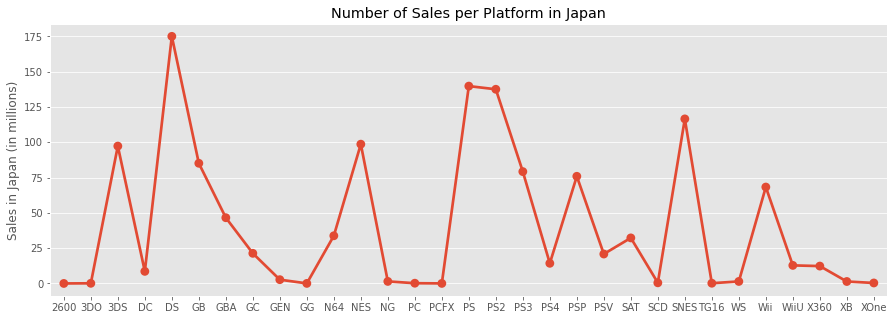

In [47]:
platform_JP = pd.DataFrame(data.groupby('Platform')['JP_Sales'].sum()).reset_index()

plt.figure(figsize = (15,5))
sns.pointplot(data = platform_JP,
           x = 'Platform',
           y = 'JP_Sales')
plt.xlabel('')
plt.ylabel('Sales in Japan (in millions)')
plt.title('Number of Sales per Platform in Japan')

Top selling platforms in Japan are DS, PS and PS2.

Text(0.5, 1.0, 'Number of Sales per Platform in Other Regions')

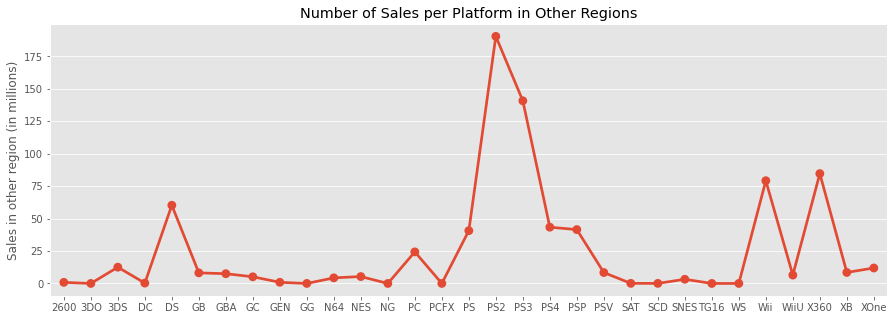

In [48]:
platform_OT = pd.DataFrame(data.groupby('Platform')['Other_Sales'].sum()).reset_index()

plt.figure(figsize = (15,5))
sns.pointplot(data = platform_OT,
           x = 'Platform',
           y = 'Other_Sales')
plt.xlabel('')
plt.ylabel('Sales in other region (in millions)')
plt.title('Number of Sales per Platform in Other Regions')

Top selling platforms in other regions are PS2 and PS3.

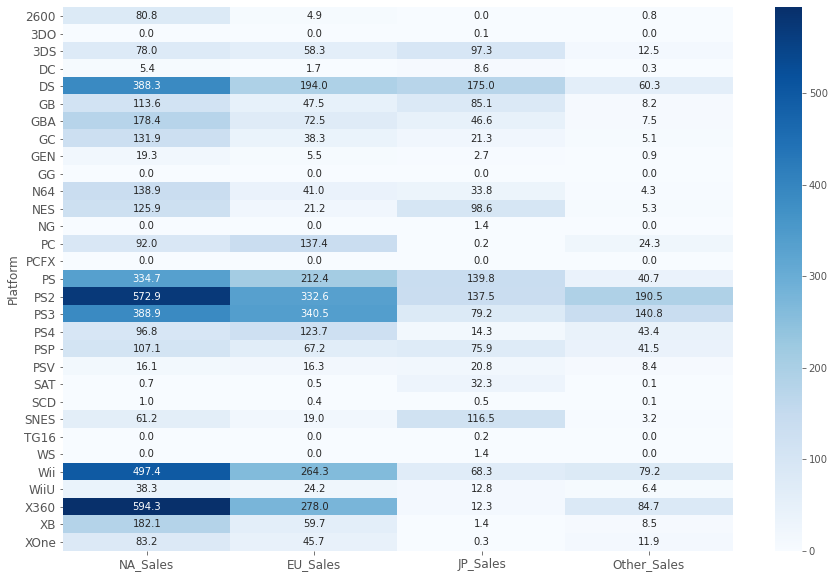

In [49]:
comp_genre = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby('Platform').sum()

plt.figure(figsize=(15, 10))

sns.heatmap(comp_map, annot=True, cmap = 'Blues', fmt = '.1f')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [50]:
platform = pd.DataFrame(data.groupby('Platform')['Global_Sales'].sum()).reset_index()
Top = platform.sort_values('Global_Sales', ascending = False).head(10)
Top

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.62
15,PS,727.39
6,GBA,305.62
19,PSP,291.71
18,PS4,278.07
13,PC,254.70


Text(0.5, 1.0, 'Number of Sales per Platform in the World')

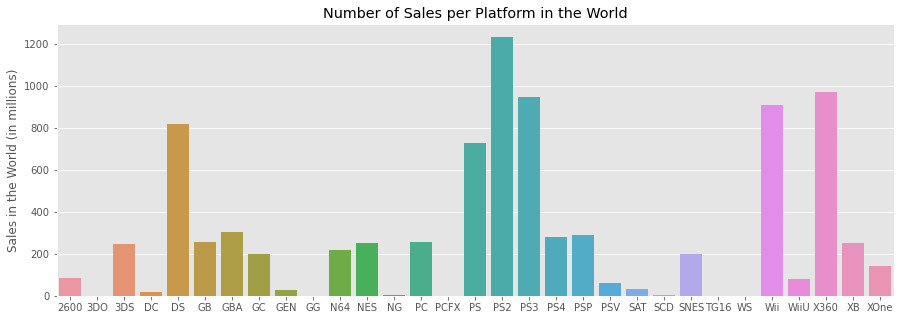

In [51]:
plt.figure(figsize = (15,5))
sns.barplot(data = platform,
           x = 'Platform',
           y = 'Global_Sales')
plt.xlabel('')
plt.ylabel('Sales in the World (in millions)')
plt.title('Number of Sales per Platform in the World')

In [88]:
Top_10_platform = Top['Platform'].unique()
Top_10_platform

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PS4', 'PC'],
      dtype=object)

Text(0, 0.5, 'Sales in the World (in millions)')

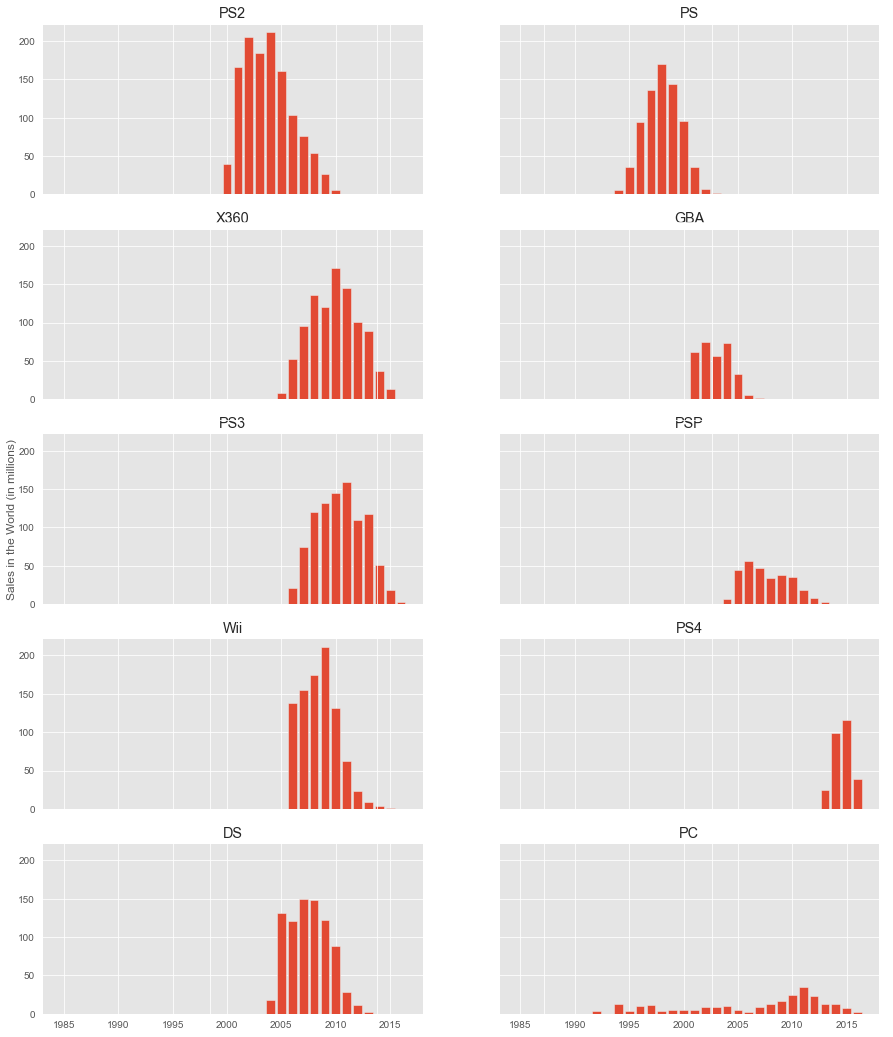

In [89]:
fig, axs = plt.subplots(5,2,sharex=True, sharey = True, figsize=(15,10))
plt.subplots_adjust(top=1.5)

for i in range(5):
    df_game = pd.DataFrame(data[data['Platform'] == Top_10_platform[i]].groupby('Year')['Global_Sales'].sum()).reset_index()
    axs[i,0].bar(df_game['Year'], df_game['Global_Sales'])
    axs[i,0].title.set_text(Top_10_platform[i])

for i in range(5,10):
    df_game = pd.DataFrame(data[data['Platform'] == Top_10_platform[i]].groupby('Year')['Global_Sales'].sum()).reset_index()
    axs[i-5,1].bar(df_game['Year'], df_game['Global_Sales'])
    axs[i-5,1].title.set_text(Top_10_platform[i])
    

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.ylabel('Sales in the World (in millions)')

Though PS2 is the best selling platform, it was only popular around 2000-2005, and was gradually taken over by X360, PS3 and Wii.

NA markets purchased more X360 and Wii games, and EU markets loves PS3 the best, partially suggesting that NA and EU markets following the trends closely. However, the most selling platform in Japan are DS and PS, which are launched earlier. 

Wii targets a broader demographic of players though novel gameplay instead of computational power compared to X360 and PS3. It was extremely popolar since launch but after 5th year, sales for games on Wii sharply dropped: Wii had generally been shunned by the core gaming audience as it was perceived more as a casual gaming experience. 

## Sales by Genre

Text(0.5, 1.0, 'Number of Sales per Genre in Northern America')

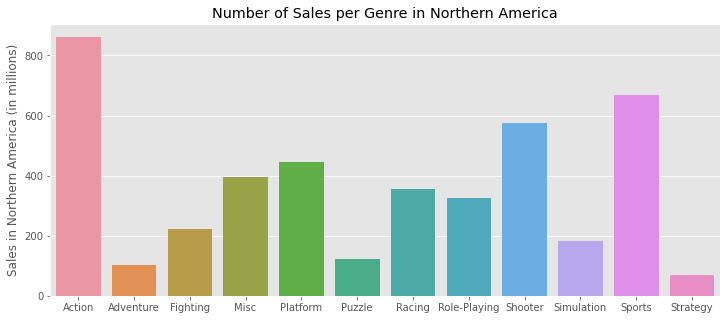

In [54]:
genre_NA = pd.DataFrame(data.groupby('Genre')['NA_Sales'].sum()).reset_index()

plt.figure(figsize = (12,5))
sns.barplot(data = genre_NA,
           x = 'Genre',
           y = 'NA_Sales')
plt.xlabel('')
plt.ylabel('Sales in Northern America (in millions)')
plt.title('Number of Sales per Genre in Northern America')

Text(0.5, 1.0, 'Number of Sales per Genre in Europe')

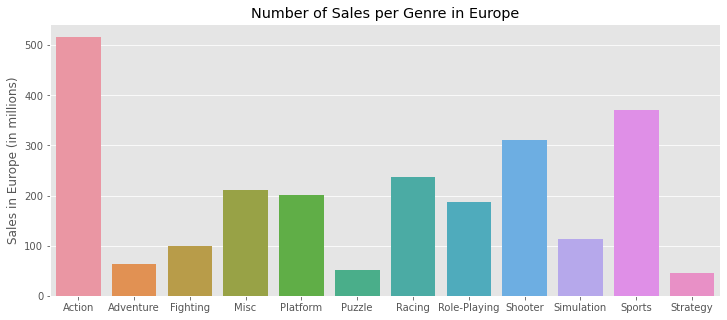

In [55]:
genre_EU = pd.DataFrame(data.groupby('Genre')['EU_Sales'].sum()).reset_index()

plt.figure(figsize = (12,5))
sns.barplot(data = genre_EU,
           x = 'Genre',
           y = 'EU_Sales')
plt.xlabel('')
plt.ylabel('Sales in Europe (in millions)')
plt.title('Number of Sales per Genre in Europe')

Text(0.5, 1.0, 'Number of Sales per Genre in Japan')

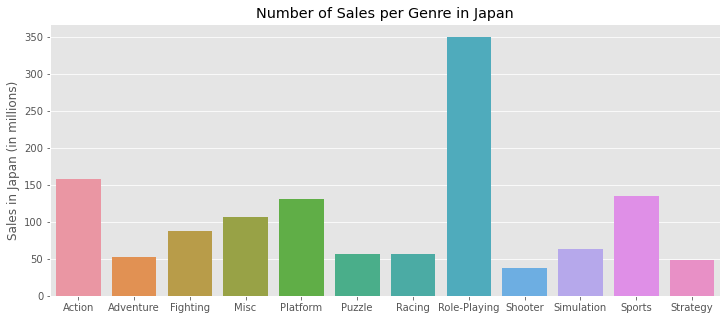

In [56]:
genre_JP = pd.DataFrame(data.groupby('Genre')['JP_Sales'].sum()).reset_index()

plt.figure(figsize = (12,5))
sns.barplot(data = genre_JP,
           x = 'Genre',
           y = 'JP_Sales')
plt.xlabel('')
plt.ylabel('Sales in Japan (in millions)')
plt.title('Number of Sales per Genre in Japan')

Text(0.5, 1.0, 'Number of Sales per Genre in Other Regions')

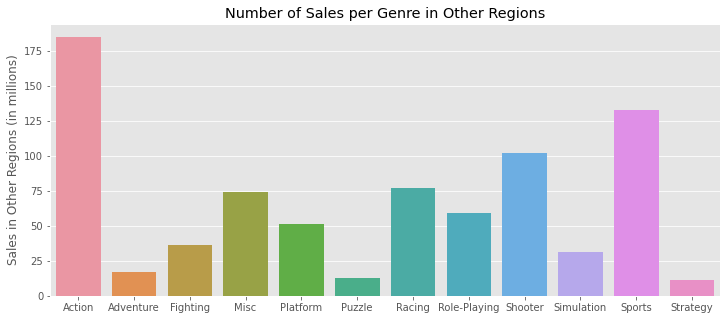

In [57]:
genre_OT = pd.DataFrame(data.groupby('Genre')['Other_Sales'].sum()).reset_index()

plt.figure(figsize = (12,5))
sns.barplot(data = genre_OT,
           x = 'Genre',
           y = 'Other_Sales')
plt.xlabel('')
plt.ylabel('Sales in Other Regions (in millions)')
plt.title('Number of Sales per Genre in Other Regions')

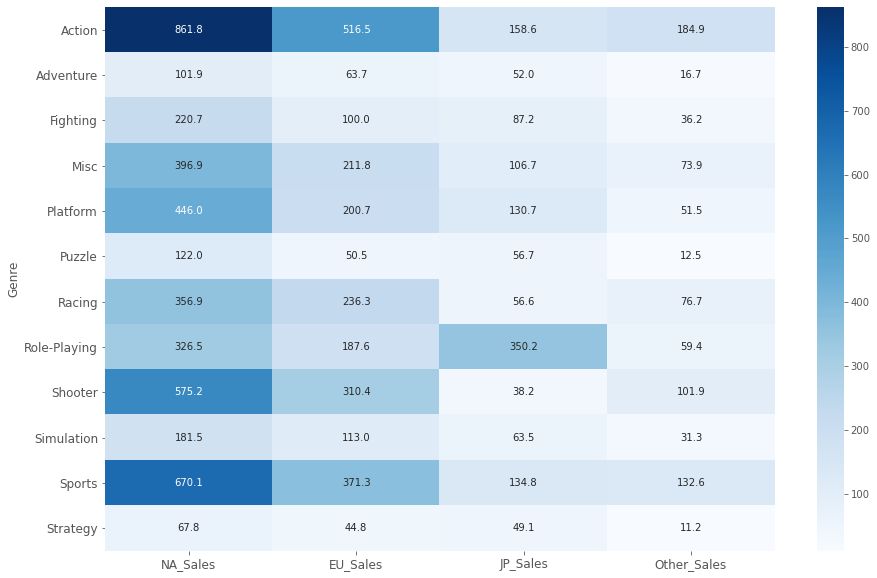

In [58]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby('Genre').sum()

plt.figure(figsize=(15, 10))

sns.heatmap(comp_map, annot=True, cmap = 'Blues', fmt = '.1f')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- For all the genres (except for role-playing), Northern America has the highest sales
- For NA, EU and Other regions, top 3 genres are actions, sports and shooter.
- For Japan, role-playing is the most popular genre and sales of role-playing games in Japan is even higher then in Northern America

In [59]:
genre = pd.DataFrame(data.groupby('Genre')['Global_Sales'].sum()).sort_values('Global_Sales', ascending = False).reset_index()
genre

,Genre,Global_Sales
0,Action,1722.83
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.79
4,Platform,829.13
5,Misc,789.87
6,Racing,726.76
7,Fighting,444.05
8,Simulation,389.69
9,Puzzle,242.21


Text(0.5, 1.0, 'Number of Sales per Genre in the World')

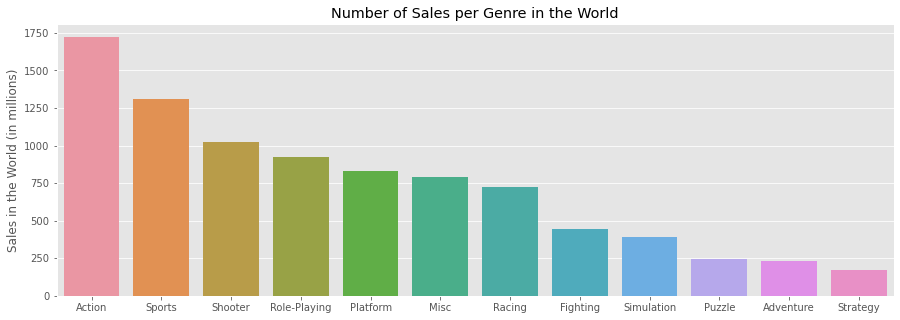

In [60]:
plt.figure(figsize = (15,5))
sns.barplot(data = genre,
           x = 'Genre',
           y = 'Global_Sales')
plt.xlabel('')
plt.ylabel('Sales in the World (in millions)')
plt.title('Number of Sales per Genre in the World')

Action and Sports are always in top. but in third whis is remarkable "Shooter", in count which was no 5

In [92]:
Top_5_genre = genre['Genre'].head(5).unique()
Top_5_genre

array(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'],
      dtype=object)

Text(0, 0.5, 'Sales in the World (in millions)')

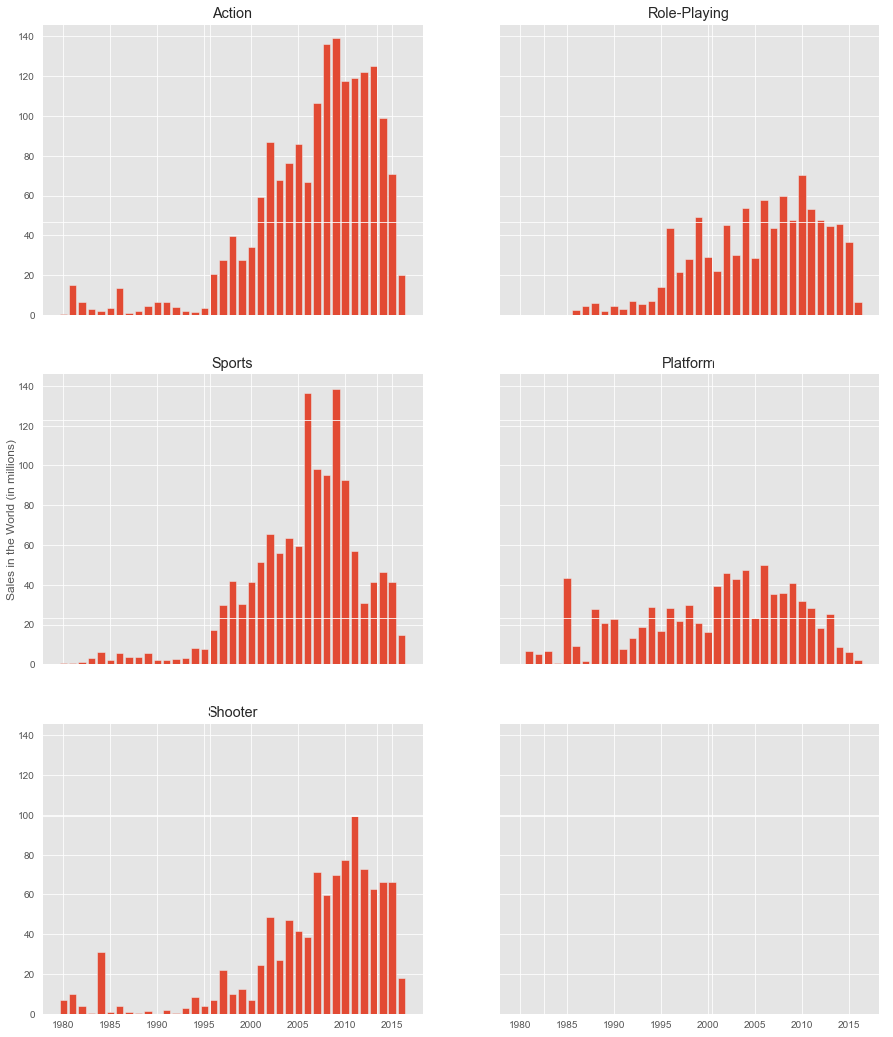

In [93]:
fig, axs = plt.subplots(3,2,sharex=True, sharey = True, figsize=(15,10))
plt.subplots_adjust(top=1.5)

for i in range(3):
    df_game = pd.DataFrame(data[data['Genre'] == Top_5_genre[i]].groupby('Year')['Global_Sales'].sum()).reset_index()
    axs[i,0].bar(df_game['Year'], df_game['Global_Sales'])
    axs[i,0].title.set_text(Top_5_genre[i])

for i in range(3,5):
    df_game = pd.DataFrame(data[data['Genre'] == Top_5_genre[i]].groupby('Year')['Global_Sales'].sum()).reset_index()
    axs[i-3,1].bar(df_game['Year'], df_game['Global_Sales'])
    axs[i-3,1].title.set_text(Top_5_genre[i])
    

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.ylabel('Sales in the World (in millions)')

- Overall, sales of all the top 5 genres follow the same trend: sales increased gradually till 2005-2010 and decreased since then
- Peak for sports games are earlier compared to actions and shooters games.
- The peak sales for role-playing and platform games (No.4 and No.5) are only half of the peak of sales of action games.

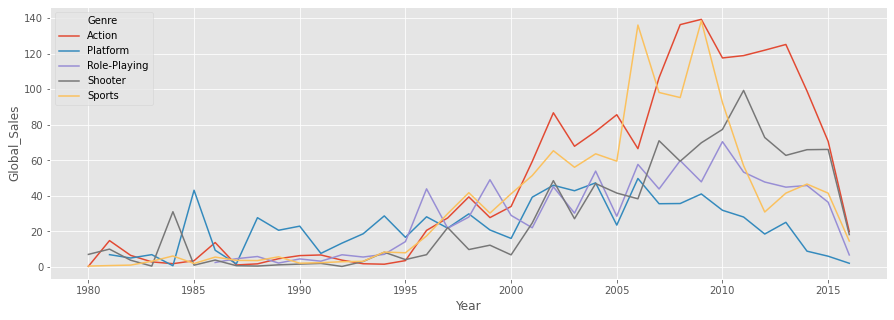

In [63]:
data_genre = pd.DataFrame(data[data['Genre'].isin(Top_5)].groupby(['Genre', 'Year'])['Global_Sales'].sum()).reset_index()

plt.figure(figsize = (15,5))

sns.lineplot(data = data_genre,
            x = 'Year',
            y = 'Global_Sales',
            hue = 'Genre')

## Sales per publisher

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

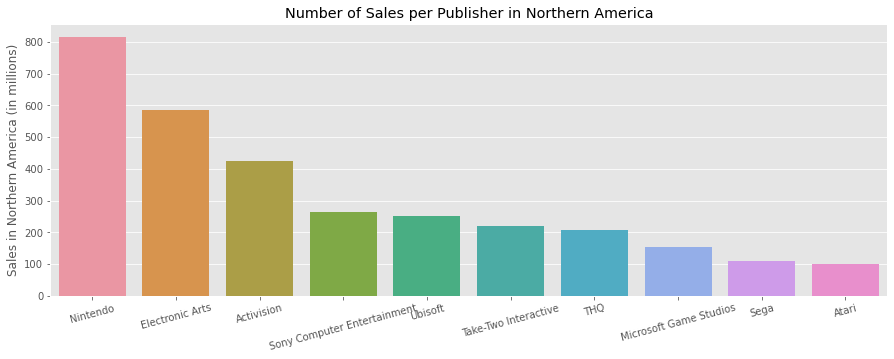

In [64]:
publisher_NA = pd.DataFrame(data.groupby('Publisher')['NA_Sales'].sum()).\
                            sort_values('NA_Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (15,5))
sns.barplot(data = publisher_NA,
           x = 'Publisher',
           y = 'NA_Sales')
plt.xlabel('')
plt.ylabel('Sales in Northern America (in millions)')
plt.title('Number of Sales per Publisher in Northern America')
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

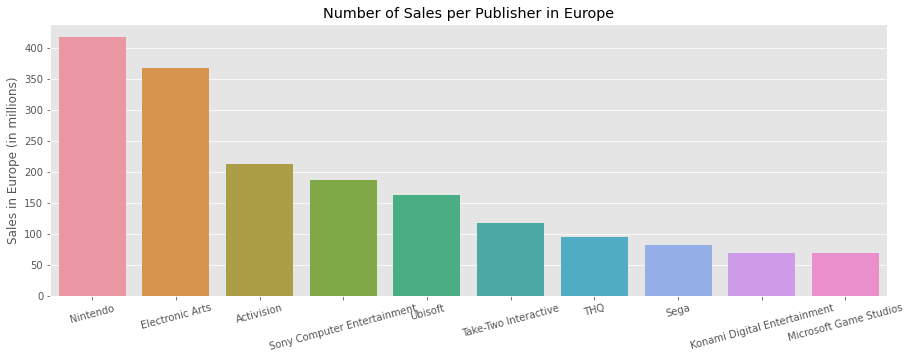

In [65]:
publisher_EU = pd.DataFrame(data.groupby('Publisher')['EU_Sales'].sum()).\
                        sort_values('EU_Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (15,5))
sns.barplot(data = publisher_EU,
           x = 'Publisher',
           y = 'EU_Sales')
plt.xlabel('')
plt.ylabel('Sales in Europe (in millions)')
plt.title('Number of Sales per Publisher in Europe')
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

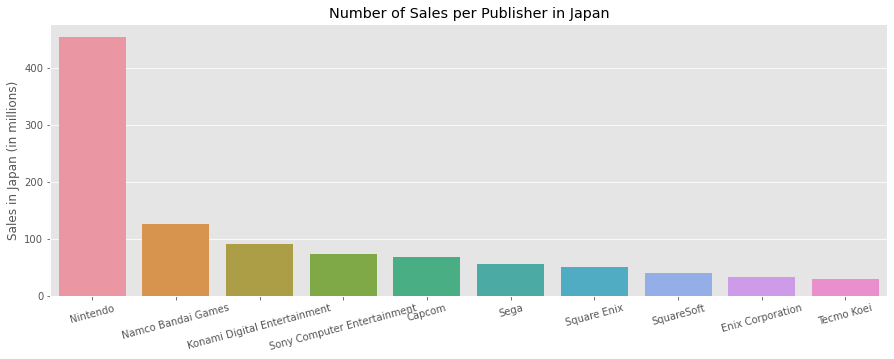

In [66]:
publisher_JP = pd.DataFrame(data.groupby('Publisher')['JP_Sales'].sum()).\
                        sort_values('JP_Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (15,5))
sns.barplot(data = publisher_JP,
           x = 'Publisher',
           y = 'JP_Sales')
plt.xlabel('')
plt.ylabel('Sales in Japan (in millions)')
plt.title('Number of Sales per Publisher in Japan')
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

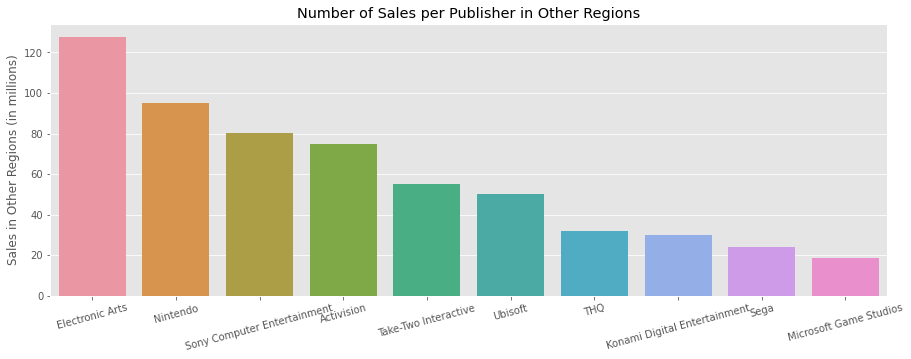

In [67]:
publisher_OT = pd.DataFrame(data.groupby('Publisher')['Other_Sales'].sum()).\
                        sort_values('Other_Sales', ascending = False).reset_index().head(10)

plt.figure(figsize = (15,5))
sns.barplot(data = publisher_OT,
           x = 'Publisher',
           y = 'Other_Sales')
plt.xlabel('')
plt.ylabel('Sales in Other Regions (in millions)')
plt.title('Number of Sales per Publisher in Other Regions')
plt.xticks(rotation = 15)

In [68]:
publisher = pd.DataFrame(data.groupby('Publisher')['Global_Sales'].sum()).\
                        sort_values('Global_Sales', ascending = False).reset_index().head(10)
publisher

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.25
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.66
9,Namco Bandai Games,253.65


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

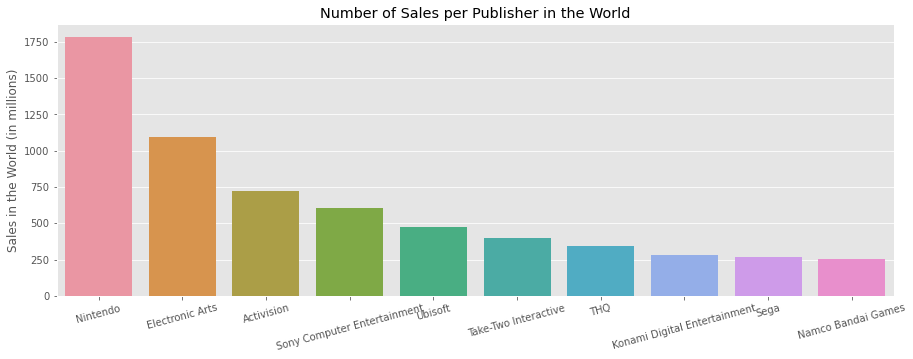

In [69]:
plt.figure(figsize = (15,5))
sns.barplot(data = publisher,
           x = 'Publisher',
           y = 'Global_Sales')
plt.xlabel('')
plt.ylabel('Sales in the World (in millions)')
plt.title('Number of Sales per Publisher in the World')
plt.xticks(rotation = 15)

- In NA and EU markets, top selling publishers are Nintendo, Eletronic Arts and Activision
- In Japan, Nintendo games sold the most, the other top publishers are totally different from NA and EU markets.
- Nintendo games sales the most in the wold, however the total number of games from Nintendo during 1980-2016 only ranked at 6.

In [94]:
Top_10_publisher = publisher['Publisher'].unique()
Top_10_publisher

array(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive',
       'THQ', 'Konami Digital Entertainment', 'Sega',
       'Namco Bandai Games'], dtype=object)

Text(0, 0.5, 'Sales in the World (in millions)')

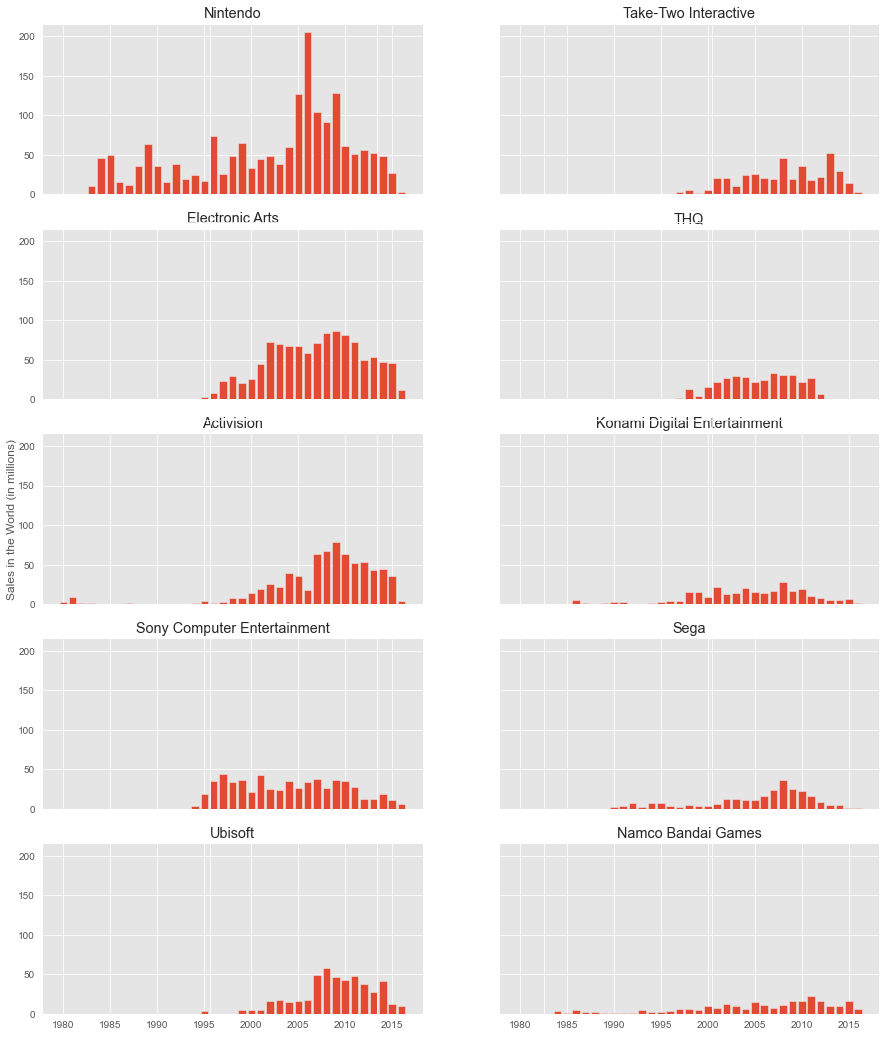

In [95]:
fig, axs = plt.subplots(5,2,sharex=True, sharey = True, figsize=(15,10))
plt.subplots_adjust(top=1.5)

for i in range(5):
    df_game = pd.DataFrame(data[data['Publisher'] == Top_10_publisher[i]].groupby('Year')['Global_Sales'].sum()).reset_index()
    axs[i,0].bar(df_game['Year'], df_game['Global_Sales'])
    axs[i,0].title.set_text(Top_10_publisher[i])

for i in range(5,10):
    df_game = pd.DataFrame(data[data['Publisher'] == Top_10_publisher[i]].groupby('Year')['Global_Sales'].sum()).reset_index()
    axs[i-5,1].bar(df_game['Year'], df_game['Global_Sales'])
    axs[i-5,1].title.set_text(Top_10_publisher[i])
    

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.ylabel('Sales in the World (in millions)')

The world sales' peak at 2005-2010 was mainly driven by Nintendo games.

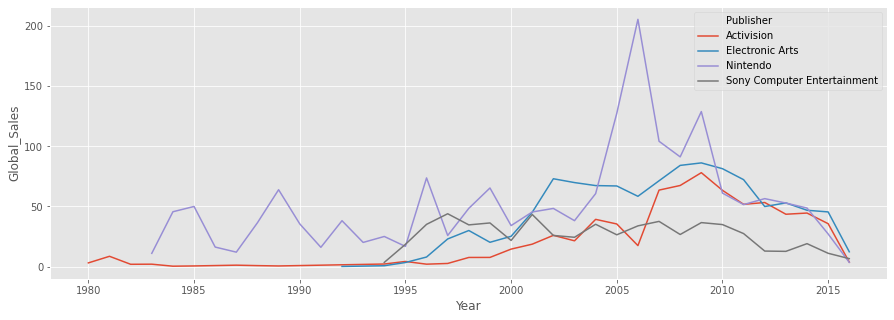

In [72]:
Top_4 = Top_10[0:4]
data_genre = pd.DataFrame(data[data['Publisher'].isin(Top_4)].groupby(['Publisher', 'Year'])['Global_Sales'].sum()).reset_index()

plt.figure(figsize = (15,5))

sns.lineplot(data = data_genre,
            x = 'Year',
            y = 'Global_Sales',
            hue = 'Publisher')

Nintendo: The reason of Nintendo being the best-selling publisher was mainly due to the peak in 2005-2010, when wii was launched and popular around the world.

## Global Sales per Year

In [73]:
sales_per_year = pd.DataFrame(data.groupby('Year')['Global_Sales'].sum()).reset_index()

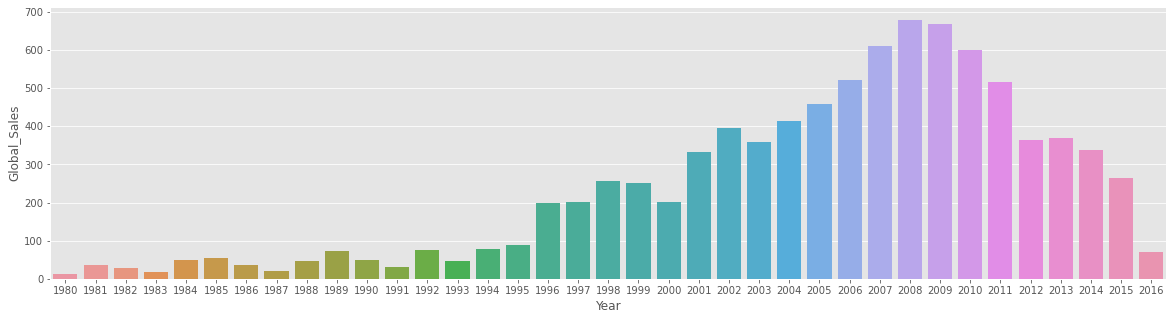

In [74]:
plt.figure(figsize = (20,5))

sns.barplot(data = sales_per_year,
            x = 'Year',
            y = 'Global_Sales')

# Other analysis

## 1. Which genre game has been released the most in a single year?

In [75]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name = 'count')
year_max_df

,Year,Genre,count
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1980,Sports,1
...,...,...,...
381,2016,Role-Playing,40
382,2016,Shooter,32
383,2016,Simulation,9
384,2016,Sports,38


In [76]:
year_max = year_max_df[year_max_df.groupby(['Year'])['count'].\
                        transform(max) == year_max_df['count']].\
                        drop_duplicates(subset=["Year", "count"], keep='last').\
                        reset_index(drop = True)
year_max.head()

,Year,Genre,count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Shooter,3


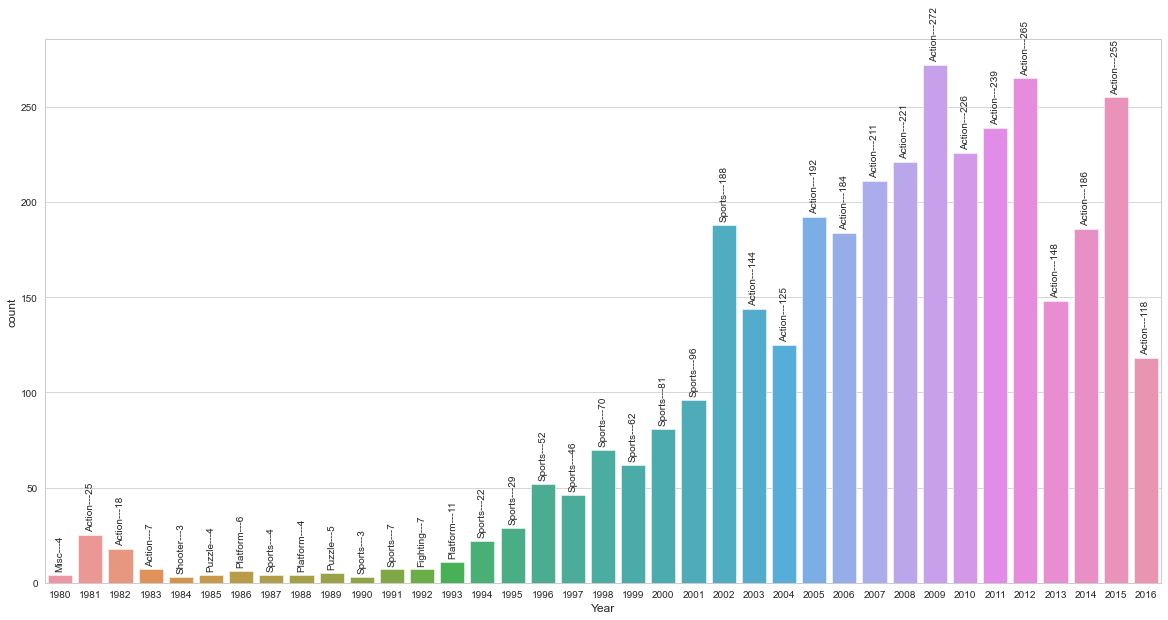

In [77]:
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')

fig = sns.barplot(data = year_max,
            x = 'Year',
            y = 'count')
index = 0

for value in year_max['count'].values:
    fig.text(index, value + 3, str(year_max['Genre'][index] + '---' +str(value)), size=10, rotation= 90, ha="center")
    index+=1

Since 2003, action games are released the most. Top 3:2009 Action - 272, 2012 Action - 266 games and 2015 Action - 255 games are released.

## 2.  Which genre game has the highest sales in a single year?

In [78]:
year_max_sales = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_max_sales

,Year,Genre,Global_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.71
3,1980,Shooter,7.07
4,1980,Sports,0.49
...,...,...,...
381,2016,Role-Playing,6.76
382,2016,Shooter,18.22
383,2016,Simulation,0.39
384,2016,Sports,14.60


In [79]:
year_max = year_max_sales[year_max_sales.groupby(['Year'])['Global_Sales'].\
                        transform(max) == year_max_sales['Global_Sales']].\
                        reset_index(drop = True)
year_max.head()

,Year,Genre,Global_Sales
0,1980,Shooter,7.07
1,1981,Action,14.84
2,1982,Puzzle,10.03
3,1983,Platform,6.93
4,1984,Shooter,31.10


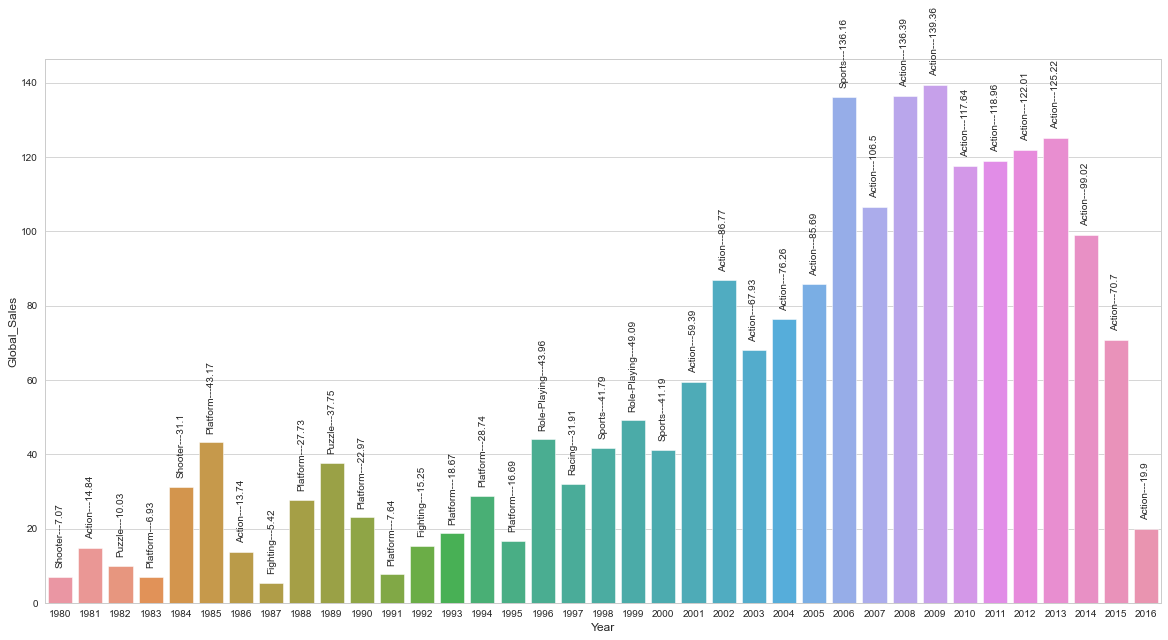

In [80]:
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')

fig = sns.barplot(data = year_max,
            x = 'Year',
            y = 'Global_Sales')
index = 0

for value in year_max['Global_Sales'].values:
    fig.text(index, value + 3, str(year_max['Genre'][index] + '---' +str(round(value,2))), size=10, rotation= 90, ha="center")
    index+=1

Since 2001, action games are sold the most. Top 3:2009 Action - 139.36m, 2008 Action - 136.39m and 2006 Action - 136.16m are released.

# 4. Multiple linear regression

The background is that as an American company, when we are only available to NA_market's sales, we developed the following linear regression model to predict global sales. 

For simplicity and to target the main players in the industry, we only use top 10 platform, top 5 genre and top 10 publisher as input of the model.

In [113]:
df = data[data['Platform'].isin(Top_10_platform)]
df = df[df['Genre'].isin(Top_5_genre)]
df = df[df['Publisher'].isin(Top_10_publisher)]
df.reset_index(drop=True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
4,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
...,...,...,...,...,...,...,...,...,...,...,...
3704,16536,Metal Gear Solid HD Edition,X360,2011,Action,Konami Digital Entertainment,0.00,0.00,0.01,0.00,0.01
3705,16540,Transformers: Fall of Cybertron,PC,2012,Action,Activision,0.01,0.00,0.00,0.00,0.01
3706,16547,Imagine Figure Skater (JP sales),DS,2007,Sports,Ubisoft,0.00,0.00,0.01,0.00,0.01
3707,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01


In [129]:
y = df['Global_Sales']
x = df.iloc[:,2:7]
x = pd.get_dummies(x, columns = ['Platform','Genre','Publisher'])
x.head()

,Year,NA_Sales,Platform_DS,Platform_GBA,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,...,Publisher_Activision,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft
0,2006,41.49,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009,15.75,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,2006,11.38,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,2009,14.59,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13,2007,8.94,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [131]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

In [132]:
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_pred)
print(r2_MultiLinear)

0.9089651176996354


In [133]:
for i, col in enumerate(x_train.columns):
    print(col + ':', round(regressor.coef_[i],2))

Year: 0.01
NA_Sales: 2.0
Platform_DS: -0.06
Platform_GBA: -0.15
Platform_PC: 0.09
Platform_PS: 0.03
Platform_PS2: -0.0
Platform_PS3: 0.11
Platform_PS4: 0.36
Platform_PSP: 0.0
Platform_Wii: -0.15
Platform_X360: -0.24
Genre_Action: 0.0
Genre_Platform: -0.05
Genre_Role-Playing: 0.08
Genre_Shooter: 0.0
Genre_Sports: -0.03
Publisher_Activision: -0.13
Publisher_Electronic Arts: -0.07
Publisher_Konami Digital Entertainment: 0.16
Publisher_Namco Bandai Games: -0.01
Publisher_Nintendo: 0.32
Publisher_Sega: 0.07
Publisher_Sony Computer Entertainment: -0.09
Publisher_THQ: -0.09
Publisher_Take-Two Interactive: -0.12
Publisher_Ubisoft: -0.03
